In [1]:
import tensorflow
from tensorflow import keras

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
batch_size = 128
num_class = 10
epochs = 20

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
keras.backend.image_data_format()

'channels_last'

In [8]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

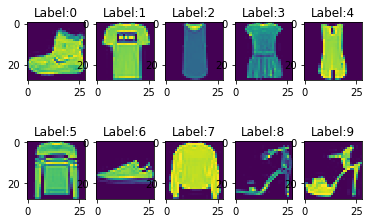

In [10]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title("Label:"+str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap=None)

In [11]:
x_train,x_test = x_train/255.0,x_test/255.0
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = (3,3),
                       activation = "relu",
                       input_shape = (28,28,1)),
    keras.layers.Conv2D(64, (3,3),activation = "relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class,activation="softmax")
    
])
#1分類の時はsigmoido, 多分類の時はsoftnaxが

In [13]:
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#最適化手法　optimizer, Adam, RMSprop,SGD
#loss categorical_crossentropy: 他クラス分類でよく使われる    sparse_categorical_crossentropy：特定の値が大きく、他はゼロに近い

Epoch 1/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.4751 - acc: 0.8330
Epoch 2/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.3201 - acc: 0.8860
Epoch 3/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.2709 - acc: 0.9013
Epoch 4/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2405 - acc: 0.9123
Epoch 5/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.2158 - acc: 0.9207
Epoch 6/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.2014 - acc: 0.9251
Epoch 7/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1836 - acc: 0.9313
Epoch 8/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1699 - acc: 0.9361
Epoch 9/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.1627 - acc: 0.9392
Epoch 10/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1497 - a

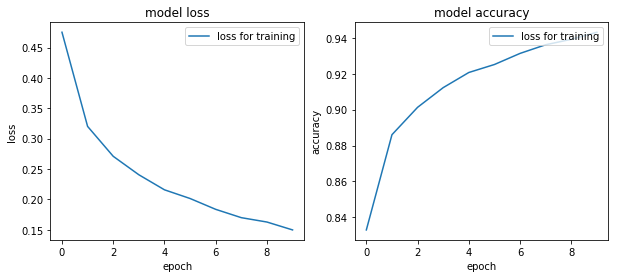

In [14]:
fit = model.fit(x_train,y_train, epochs =10)

fig, (axL, axR) =plt.subplots(ncols=2, figsize=(10,4))

axL.plot(fit.history['loss'],label="loss for training")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(fit.history['acc'],label="loss for training")
axR.set_title('model accuracy')
axR.set_xlabel('epoch')
axR.set_ylabel('accuracy')
axR.legend(loc='upper right')


In [21]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 648us/step


[0.28657858788967133, 0.9082]

In [22]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

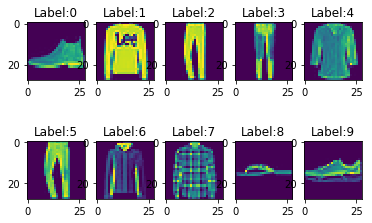

In [23]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title("Label:"+str(i))
    plt.imshow(x_test[i].reshape(28,28), cmap=None)

In [24]:
model.predict(x_test[:10])

array([[1.52030317e-16, 1.80021643e-19, 3.73432471e-19, 1.71783278e-17,
        1.95568163e-20, 1.31235524e-07, 2.31089477e-14, 6.24769086e-07,
        1.13516370e-15, 9.99999285e-01],
       [6.56080568e-09, 1.96647074e-18, 9.99999166e-01, 7.88038688e-13,
        1.08615748e-08, 7.91171251e-28, 8.82897552e-07, 1.89026471e-32,
        1.77304816e-14, 9.69501838e-32],
       [8.70999887e-13, 1.00000000e+00, 8.96475352e-18, 1.94108315e-15,
        1.63067346e-18, 1.32055750e-21, 1.24369492e-14, 7.66053211e-26,
        1.68155748e-18, 2.82713675e-23],
       [1.53548591e-14, 1.00000000e+00, 1.46392625e-16, 3.52805784e-12,
        8.13813374e-16, 3.25430731e-26, 7.08735032e-14, 1.07725351e-27,
        3.55138002e-18, 7.26670030e-24],
       [2.39717700e-02, 4.20120327e-11, 1.34852587e-03, 6.51608389e-06,
        9.21033556e-04, 3.49062921e-14, 9.73752141e-01, 3.30200657e-18,
        2.56386556e-08, 1.09948079e-16],
       [2.06771100e-19, 1.00000000e+00, 1.10678905e-23, 6.29511752e-24,
   